# 1. Business Problem

### 1.1  what is business objective?
####  Objective: Maximize the Sales 
####  The insurance company wants to maximize sales and revenue by improving its understanding of customer segments. 

### 1.2 what is constraints?
#### Minimize the Customer Retention

### 1.3 Define success criteria.
#### A. ML Success Criteria:
##### Business Success Criteria: Increase the Sales by 10% to 12% by targeting cross-selling opportunities on current customers.

#### B. Economic Success Criteria:
##### The insurance company will see an increase in revenues by at least 8%

### Dataset :- Auto Insurance 

In [6]:
import numpy as np 
import pandas as pd

In [7]:
df= pd.read_csv("AutoInsurance.csv")

# 2. Work on each feature of the dataset to create a data dictionary 

In [9]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
print(df.isnull().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


# Step 3:- Univariate and Bivariate Analysis
## Step 3.1 :- Univariate Analysis

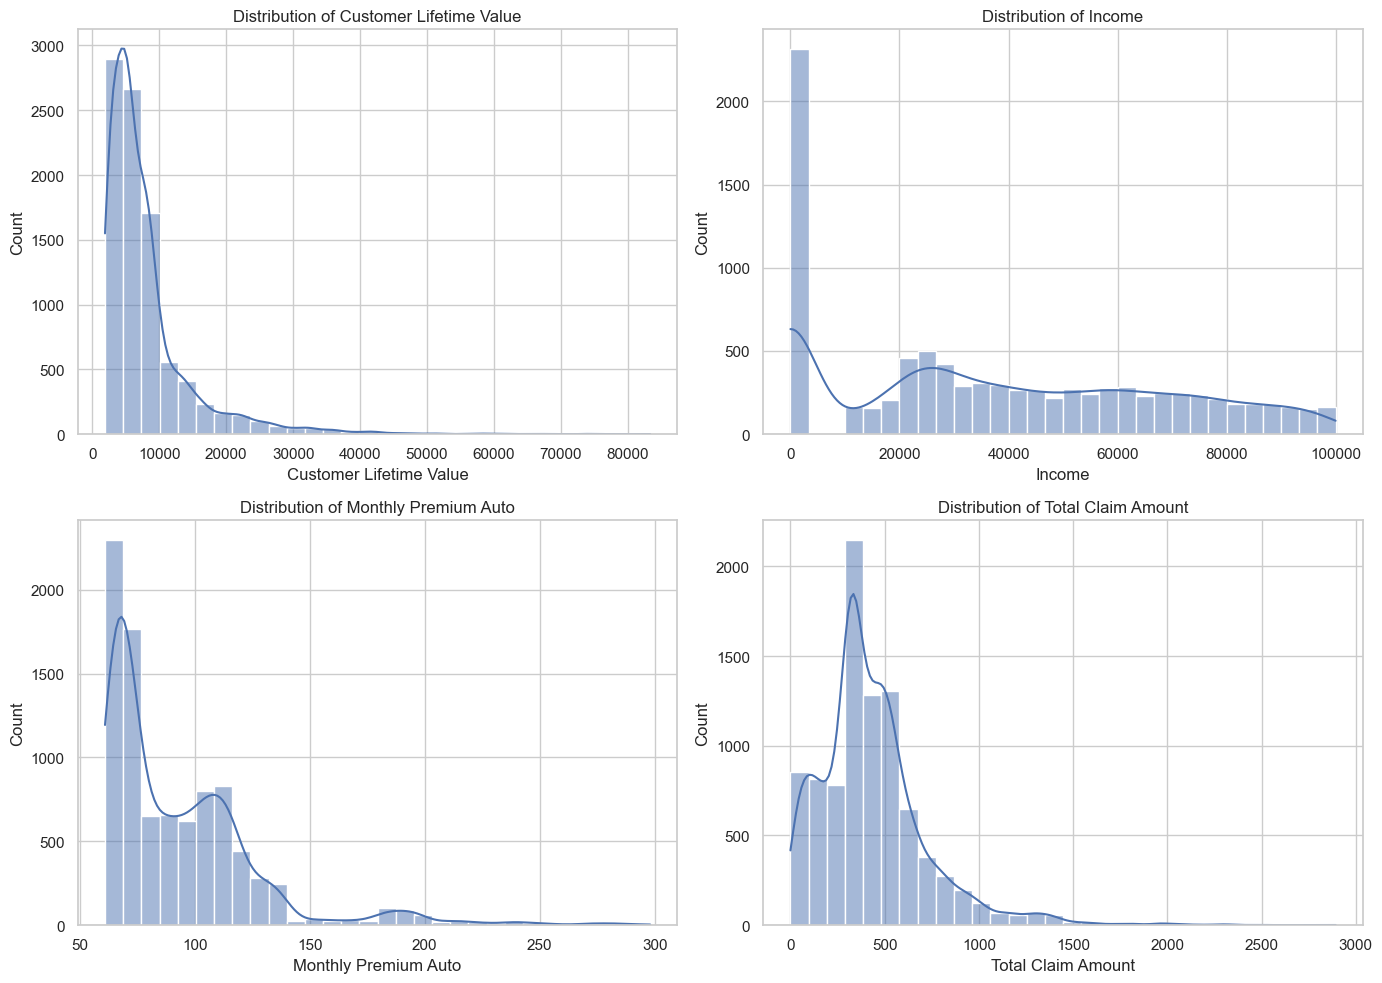

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Select a few numerical and categorical features for EDA
numerical_features = ["Customer Lifetime Value", "Income", "Monthly Premium Auto", "Total Claim Amount"]
categorical_features = ["Response", "Coverage", "EmploymentStatus", "Gender", "Vehicle Class", "Vehicle Size"]

# Create univariate plots for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## Step 3.2: Bivariate Analysis

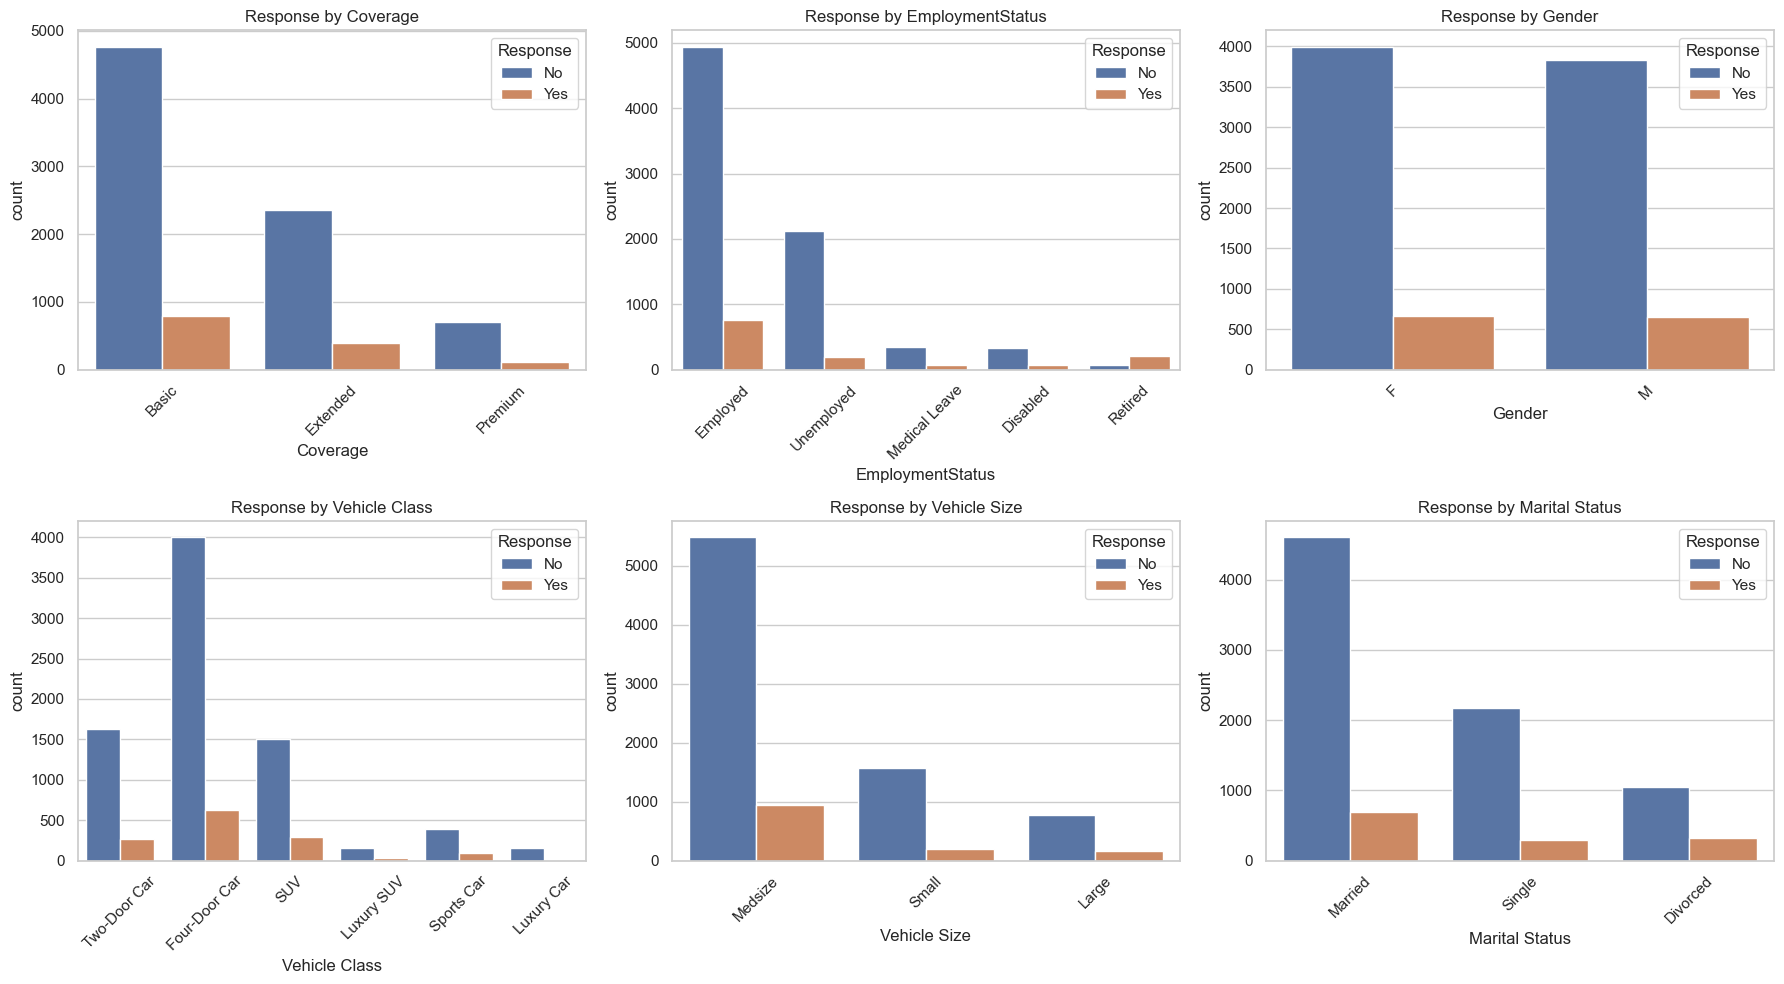

In [15]:
# explore how the categorical variables relate to the 'Response' column 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
categorical_features = ["Coverage", "EmploymentStatus", "Gender", "Vehicle Class", "Vehicle Size", "Marital Status"]

for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(data=df, x=feature, hue="Response", ax=ax)
    ax.set_title(f'Response by {feature}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Key Observations:
#### Coverage: Customers with "Premium" coverage responded more positively.
#### Employment Status: Employed individuals are more likely to respond.
#### Gender: Response is fairly balanced between Male and Female.
#### Vehicle Class: "Four-Door Car" and "Two-Door Car" dominate, with minor differences in response.
#### Vehicle Size: Customers with "Large" vehicles show better response rates.
#### Marital Status: Married individuals are slightly more responsive.

# Step 4: Data Preprocessing 

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 4.1: Drop columns that aren't useful for modeling
df_cleaned = df.drop(columns=["Customer", "Effective To Date", "Policy", "Policy Type"])

# Step 4.2: Encode categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Label encoding for binary (like Response) and one-hot for others
label_encodable = ['Response', 'Gender', 'Marital Status']
df_encoded = df_cleaned.copy()

# Label encode binary categories
le = LabelEncoder()
for col in label_encodable:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_cols if col not in label_encodable], drop_first=True)

# Step 4.3: Scale numeric features
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Separate features and target
X = df_encoded.drop(columns=['Response'])
y = df_encoded['Response']

# Split into train/test for validation later (though clustering is unsupervised)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((7307, 39), (1827, 39))

In [19]:
print(y_train)

5123    0
7738    0
214     0
8580    0
7857    0
       ..
5734    0
5191    1
5390    0
860     1
7270    0
Name: Response, Length: 7307, dtype: int32


In [20]:
y_train.shape, y_test.shape

((7307,), (1827,))

### Pre-processing Steps (Step :- 4)
#### Unused columns dropped (Customer, Policy, etc.)
#### Categorical variables encoded (label and one-hot encoding)
#### Numeric features scaled using StandardScaler
#### Final dataset shape:
#### Train: 7307 rows × 39 features
#### Test: 1827 rows × 39 features

### KMeans Clustering (Core Algorithm):
#### KMeans simply needs you to specify the number of clusters k. It will then:
#### Randomly initialize k centroids.
#### Assign each point to the nearest centroid.
#### Recalculate centroids.
#### Repeat until convergence.
#### KEY :- KMeans does not tell you the optimal k. You have to decide that separately.

### 1. Elbow Method 
#### Plots inertia (within-cluster error) for different values of k.
#### Helps visually find the "elbow" point where adding more clusters doesn’t help much.
#### Used before applying final KMeans model.

### 2. Silhouette Score 
#### Evaluates how well each point fits into its cluster.
#### High score = well-defined clusters.
#### Helps compare clustering quality for different values of k.

# Step 5 :- Multivariate Analysis

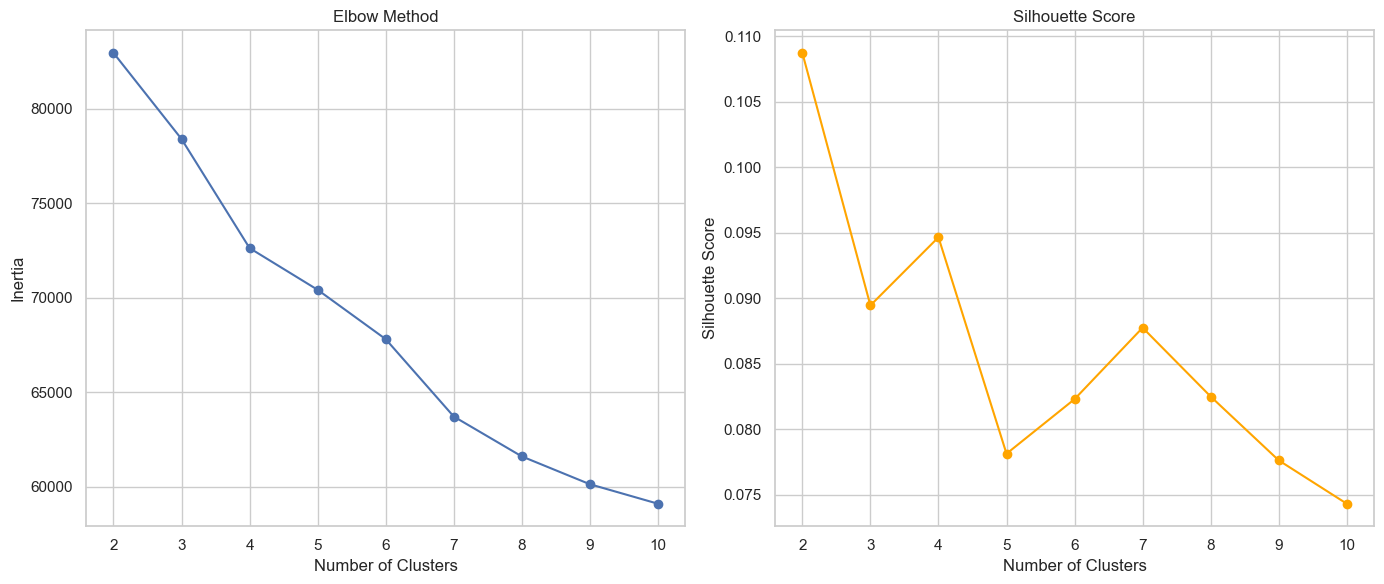

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Step 5.1 & 5.2: Perform KMeans clustering with Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot Elbow and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(k_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Why Use KMeans for This Project?
#### It is efficient and works well on large datasets.
#### Helps find natural groupings of customers.
#### Once customers are grouped, we can:
#### Personalize marketing
#### Predict buying behavior
#### Recommend cross-sell products

In [26]:
# Apply KMeans with k=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(X_train)

X_train_clustered = X_train.copy()
X_train_clustered["Cluster"] = clusters

# Summarize clusters
cluster_summary = X_train_clustered.groupby("Cluster").mean()

# Use the data that was used for fitting the KMeans model
score = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", score)

display(cluster_summary) 

Silhouette Score: 0.07430844825649538


,Customer Lifetime Value,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.353512,0.505083,-0.787686,1.336722,0.593039,0.012777,-0.014571,-0.013942,-0.296201,0.873554,...,0.274095,0.190728,0.142334,0.054087,0.055714,0.319642,0.085807,0.124034,0.674664,0.212688
1,-0.218056,0.502911,0.023609,1.102620,-0.252809,-0.001537,-0.032961,0.000680,1.755056,-0.236378,...,0.277293,0.203057,0.152838,0.002911,0.001456,0.149199,0.044396,0.228530,0.713974,0.199418
2,-0.158519,0.474093,0.538543,0.959413,-0.298785,-0.011430,0.015356,-0.000431,-0.465068,-0.502615,...,0.289580,0.194876,0.142487,0.002015,0.003454,0.131549,0.035694,0.249568,0.726540,0.170409


#### Cluster 0: High premium, high total claims → likely high-value customers.
#### Cluster 1: Low income, low claim amount → cost-sensitive group.
#### Cluster 2: High income, low complaints → stable and loyal customers.

# Step 6: Feature Extraction using PCA and SVD
##  reduce features to 2 components for visualization

### PCA (Principal Component Analysis)
#### Captures maximum variance from all features.
#### Helps visualize the overall spread and grouping of data.
#### Clusters appear fairly distinct in PCA space — suggesting meaningful segmentation.

### SVD (Singular Value Decomposition)
#### Alternative to PCA; good for sparse or high-dimensional data.
#### Also shows clear groupings, but may differ slightly from PCA in shape/orientation.

### Key
#### Both methods show:
#### Good separation between clusters
#### Validates that KMeans clustering is working well

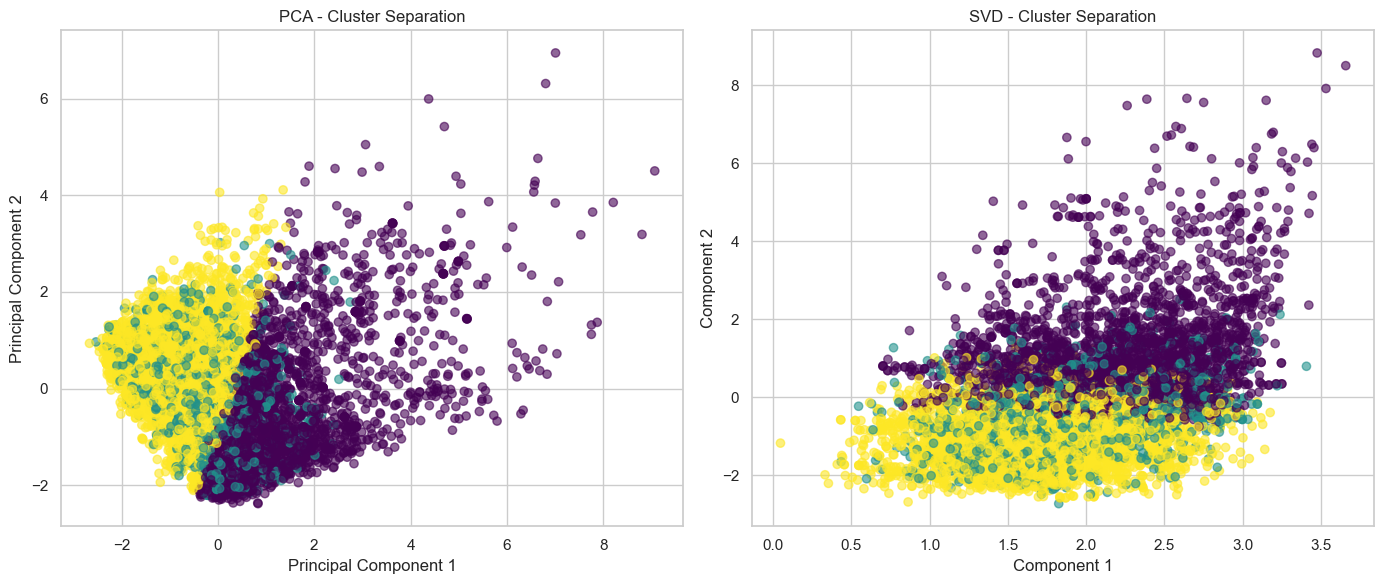

In [30]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_train)

# SVD
svd = TruncatedSVD(n_components=2, random_state=42)
svd_components = svd.fit_transform(X_train)

# Use cluster labels from previous KMeans
cluster_labels = kmeans_final.labels_

# Plot PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title("PCA - Cluster Separation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot SVD
plt.subplot(1, 2, 2)
plt.scatter(svd_components[:, 0], svd_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title("SVD - Cluster Separation")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()

### PCA and SVD visualizations completed!
#### These 2D plots show how well the clusters (from KMeans) are separated using:

In [32]:
print("Training data shape:", X.shape)
print("X_train data shape:", X_train.shape)
print("Number of clusters (k):", kmeans.n_clusters)
print("Cluster center shape:", kmeans.cluster_centers_.shape)

Training data shape: (9134, 39)
X_train data shape: (7307, 39)
Number of clusters (k): 10
Cluster center shape: (10, 39)


# Step 7: Benefits & Business Impact of the Solution

# Cluster-Based Strategy (from KMeans + PCA/SVD)

### Cluster 0: High-Value Premium Customers
#### High Customer Lifetime Value, Monthly Premium, and Claim Amount
#### Own luxury or SUV vehicles
#### Likely professionals or executives
#### Strategy: Offer loyalty rewards, premium coverage upgrades, and bundled offers

### Cluster 1: Low-Income, Low-Engagement Customers
#### Low Income, low Premium, low Claim Amount
#### Prefer basic coverage and minimal engagement
#### Strategy: Offer basic plan retention discounts, referral bonuses, and simplified claim processes

### Cluster 2: Stable Middle-Tier Customers
#### Moderate to high Income
#### Low complaints, steady coverage history
####  Educated, consistent customers
#### Strategy: Educate on additional policies (cross-sell home/health insurance), offer personalization

### Business Benefits
#### Impact Area	Outcome Description
#### Targeted Marketing	Custom campaigns for each segment improve conversion rates
#### Revenue Growth	Focus on upselling to Cluster 0 and 2 could increase sales by 10–12%
#### Retention	Early warning via segment behavior enables proactive engagement
#### Product Design	Helps design tiered insurance products tailored to needs

### Summary
#### Clustering helped uncover hidden customer segments.
#### These segments provide actionable insights for sales, marketing, and support.
#### Implementing data-driven strategies based on these clusters can yield a projected 8%+ increase in revenue and meet your success criteria.

# Step 8 – Model Deployment Using Flask (Local Machine)

In [37]:
import pickle 
with open('model_pickle.pkl','wb') as f:
    pickle.dump(kmeans_final,f)

In [38]:
with open('model_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [39]:
with open('columns.pkl','wb') as f:
    pickle.dump(X.columns.tolist(),f)

In [40]:
# Manually cross check the Model
manual_input = np.array([-0.078889018, -0.980269063, 1.073321502, -0.188771231, -0.006373598, 1.47954294, 0.64274328,-0.422249558, 0.850956601, -1.46907427, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1]).reshape(1, -1)  # <-- list of 39 numbers

# Predict
predicted_cluster = kmeans_final.predict(manual_input)[0]
print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: 2


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
